## XGBoost 

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

print(xgb.__version__)

1.3.3


In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
print(dataset.target_names)
cancer_df['target'].value_counts()

['malignant' 'benign']


1    357
0    212
Name: target, dtype: int64

In [9]:
#학습용, 테스트용 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [10]:
dtrain = xgb.DMatrix(data=X_train, label =y_train )
dtest = xgb.DMatrix(data=X_test, label =y_test )

In [12]:
# 하이퍼파라미터 설정

params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'early_stopping' : 100
    
}

numrounds = 400

In [13]:
#train 데이터 세트는 train, evaluation(test) 데이터 세트는 eval 로 명기

wlist = [(dtrain,'train'), (dtest,'eval')]

xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = numrounds, early_stopping_rounds = 100, evals = wlist)

[15:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.

In [14]:
#테스트 데이터 세트 예측 수행

pred_probs = xgb_model.predict(dtest)
print("predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨")
print(np.round(pred_probs[:10],3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print("예측값 10개만 표시:" , preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [9]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(Y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    roc_score = roc_auc_score(Y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print("정확도 {0:.4f}, 정밀도 {1:.4f}, 재현율 {2:.4f}, f1 {3:.4f}, AUC 값 : {4:.4f}".format(accuracy,precision,recall, f1,roc_score))
    


In [17]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[35  2]
 [ 1 76]]
정확도 0.9737, 정밀도 0.9744, 재현율 0.9870, f1 0.9806, AUC 값 : 0.9951


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

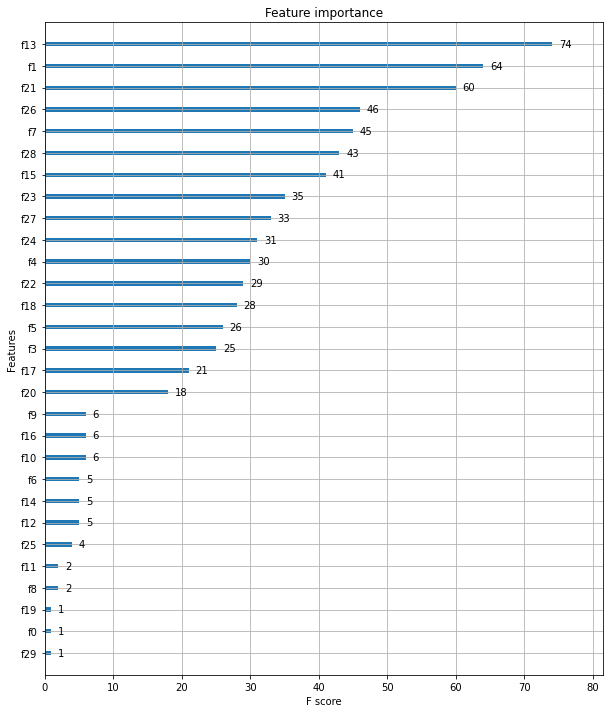

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax = ax)

### 사이킷런 XGBoost

In [27]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]



[16:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [20]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[35  2]
 [ 1 76]]
정확도 0.9737, 정밀도 0.9744, 재현율 0.9870, f1 0.9806, AUC 값 : 0.9951


In [22]:
# 조기종료 설정
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train, y_train,early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals , verbose = True)

ws100_preds = xgb_wrapper.predict(X_test)

ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [23]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도 0.9649, 정밀도 0.9620, 재현율 0.9870, f1 0.9744, AUC 값 : 0.9954


In [24]:
#조기 종료 횟수를 너무 타이트하게 잡아 성능이 저하되는 케이스




xgb_wrapper.fit(X_train, y_train,early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = evals , verbose = True)

ws10_preds = xgb_wrapper.predict(X_test)

ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]



[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [25]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도 0.9561, 정밀도 0.9615, 재현율 0.9740, f1 0.9677, AUC 값 : 0.9947


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

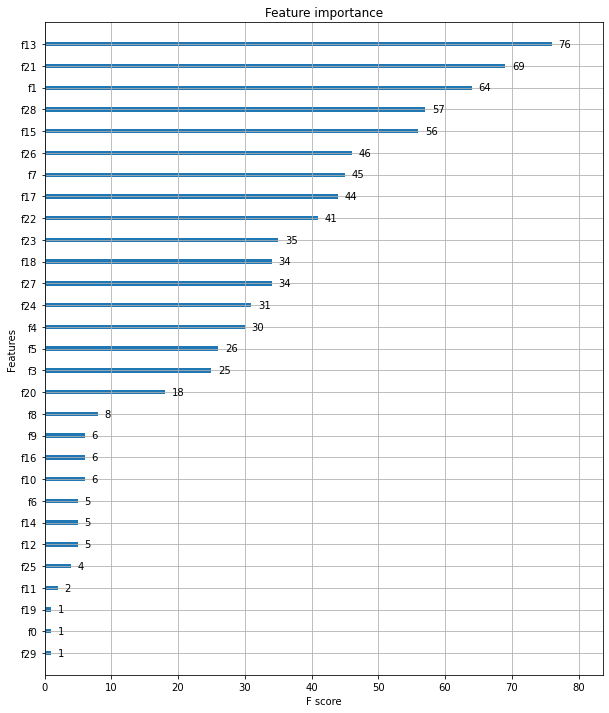

In [28]:
#조기종료 하지 않은 예측으로 피쳐 중요도 시각화
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_wrapper, ax = ax)

## LightGBM

In [7]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

lgbm_wrapper = LGBMClassifier(n_estimators = 400)

evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train,early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals , verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [10]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[33  4]
 [ 1 76]]
정확도 0.9561, 정밀도 0.9500, 재현율 0.9870, f1 0.9682, AUC 값 : 0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

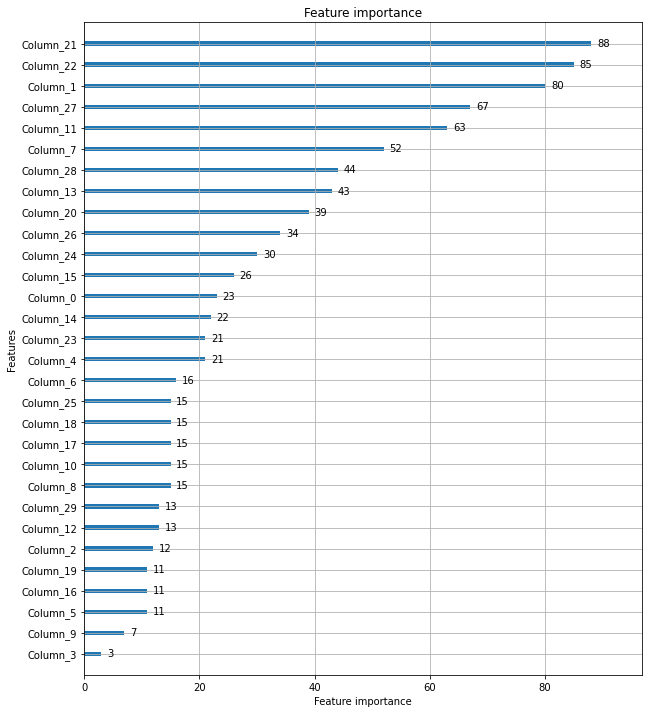

In [11]:
#피쳐 중요도 시각화

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(lgbm_wrapper, ax=ax)

### 기본 스태킹 모델

In [5]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train,X_test,y_train,y_test = train_test_split(X_data, y_label , test_size = 0.2, random_state = 0)



In [8]:
#개별 머신러닝 모델 생성

knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_cf = AdaBoostClassifier(n_estimators = 100)

lr_final = LogisticRegression(max_iter=300,C = 10)



knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_cf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [12]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_cf.predict(X_test)


print("knn 정확도 : {0:.4f}".format(accuracy_score(y_test,knn_pred)))
print("rf 정확도 : {0:.4f}".format(accuracy_score(y_test,rf_pred)))
print("dt 정확도 : {0:.4f}".format(accuracy_score(y_test,dt_pred)))
print("ada 정확도 : {0:.4f}".format(accuracy_score(y_test,ada_pred)))

knn 정확도 : 0.9211
rf 정확도 : 0.9649
dt 정확도 : 0.9035
ada 정확도 : 0.9561


In [14]:
pred = np.array([knn_pred,rf_pred,dt_pred,ada_pred])
print(pred)
print(pred.shape)

pred = np.transpose(pred)
print(pred)
print(pred.shape)

[[0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0
  1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0
  1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0
  0 0 1 0 0 1]
 [0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0
  1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0
  1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
  0 0 1 0 0 1]
 [0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0
  1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0
  1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1
  0 1 1 0 0 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0
  1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0
  1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
  1 0 1 0 0 1]]
[[0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [0 1 0 1]
 [1 1 1

In [16]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print("최종 메타 모델의 예측 정확도 : {0:.4f}".format(accuracy_score(y_test,final)))

최종 메타 모델의 예측 정확도 : 0.9649


### cv 기반의 스태킹

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds) : 
    kf = KFold(n_splits = n_folds, shuffle = False, random_state = 0)
    
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__,' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print("\t 폴드 세트", folder_counter, ' 시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        model.fit(X_tr,y_tr)
        
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:,folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
    return train_fold_pred, test_pred_mean

In [21]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test , 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test , 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test , 7)
ada_train, ada_test = get_stacking_base_datasets(ada_cf, X_train, y_train, X_test , 7)

KNeighborsClassifier  model 시작
	 폴드 세트 0  시작
	 폴드 세트 1  시작
	 폴드 세트 2  시작
	 폴드 세트 3  시작
	 폴드 세트 4  시작
	 폴드 세트 5  시작
	 폴드 세트 6  시작
RandomForestClassifier  model 시작
	 폴드 세트 0  시작
	 폴드 세트 1  시작
	 폴드 세트 2  시작
	 폴드 세트 3  시작
	 폴드 세트 4  시작
	 폴드 세트 5  시작
	 폴드 세트 6  시작
DecisionTreeClassifier  model 시작
	 폴드 세트 0  시작
	 폴드 세트 1  시작
	 폴드 세트 2  시작
	 폴드 세트 3  시작
	 폴드 세트 4  시작
	 폴드 세트 5  시작
	 폴드 세트 6  시작
AdaBoostClassifier  model 시작
	 폴드 세트 0  시작
	 폴드 세트 1  시작
	 폴드 세트 2  시작
	 폴드 세트 3  시작
	 폴드 세트 4  시작
	 폴드 세트 5  시작
	 폴드 세트 6  시작


In [22]:
Stack_final_X_train = np.concatenate((knn_train,rf_train,dt_train,ada_train), axis = 1)
Stack_final_X_test = np.concatenate((knn_test,rf_test,dt_test,ada_test), axis = 1)
print("원본 학습 피쳐 데이터 : ",X_train.shape, "원본 테스트 피쳐 : ", X_test.shape)
print("스태킹 학습 피쳐 데이터 : ",Stack_final_X_train.shape, "스태킹 테스트 피쳐 데이터 : ", Stack_final_X_test.shape)

원본 학습 피쳐 데이터 :  (455, 30) 원본 테스트 피쳐 :  (114, 30)
스태킹 학습 피쳐 데이터 :  (455, 4) 스태킹 테스트 피쳐 데이터 :  (114, 4)


In [23]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print("최종 메타 모델의 예측 정확도 : {0:.4f}".format(accuracy_score(y_test,stack_final)))

최종 메타 모델의 예측 정확도 : 0.9737
